# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd # Импортирую библиотеку pandas

In [2]:
import numpy as np # Импортирую библиотеку numpy

In [3]:
import matplotlib.pyplot as plt # Импортирую библиотеку matplotlib.pyplot

In [4]:
from datetime import datetime # Импортирую библиотеку datetime

In [5]:
import random # добавим немного рандома

In [6]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') # читаю csv-файл

In [7]:
def info(zarya):
    sombra = random.randint(0, 2)
    if sombra == 0:
        return zarya.head(5)
    elif sombra == 1:
        return zarya.sample(5)
    else:
        return zarya.tail(5) 
# функция выводит на экран рандомно (tail,sample,head) датафрейма, который мы ей передаем

In [8]:
def around_the(world):
    return world.round()
# функция, округляет все, что ей передать

In [9]:
info(data) # вывожу 5 строчек датафрейма data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


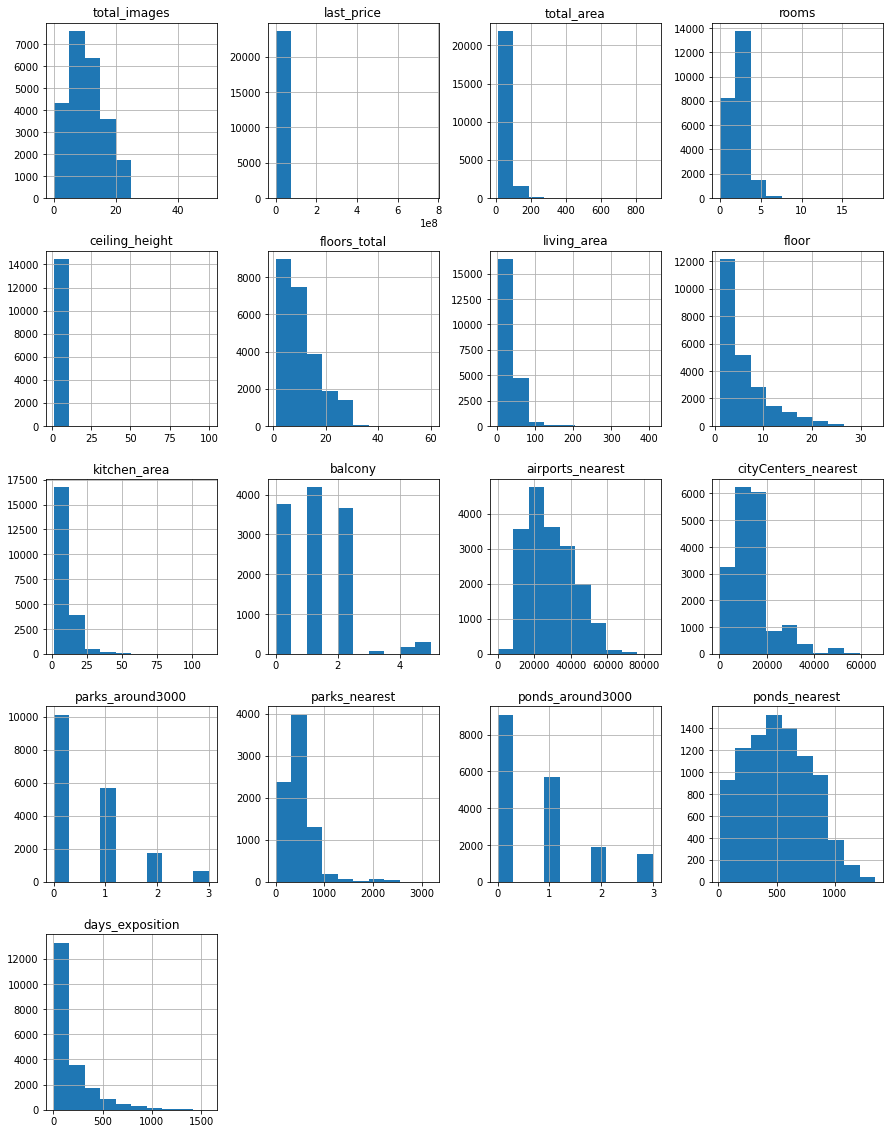

In [10]:
data.hist(figsize=(15, 20)); # строю общую гистограмму для всех столбцов таблицы

Проблемы, которые бросаются в глаза при первичном осмотре данных:

- из гистограмм видно, что в данных есть выбросы
- в названиях колонок видны нарушения стиля (прописные буквы, слитное написание слов)
- есть пропуски в данных


### Предобработка данных

In [11]:
data.columns.tolist() # выводим все названия колонок

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

In [12]:
cols = ['total_images',
        'last_price',
        'total_area',
        'first_day_exposition',
        'rooms',
        'ceiling_height',
        'floors_total',
        'living_area',
        'floor',
        'is_apartment',
        'studio',
        'open_plan',
        'kitchen_area',
        'balcony',
        'locality_name',
        'airports_nearest',
        'city_сenters_nearest',
        'parks_around_3000',
        'parks_nearest',
        'ponds_around_3000',
        'ponds_nearest',
        'days_exposition']
data.set_axis(cols, axis='columns', inplace=True) # переименовываем колонки там, где необходимо

In [13]:
data.info() # основная информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

- Не все данные хранятся в корректном, для анализа, формате. Перезапишем тип данных в некоторых колонках, чуть ниже.

In [14]:
print(data.isna().sum().sort_values()) # ищу кол-во пропущенных значений

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around_3000        5518
parks_around_3000        5518
city_сenters_nearest     5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64


Пропущенные значения есть в большей половине столбцов. 
- Больше всего пропусков в столбце "is_apartment".
- Заменим пропуски в столбце "balcony" на 0, предположив, что балконов в этих квартирах нет.
- Пропуски в толбце "ceiling_height" для меня не понятны, предположу, что эти данные могли просто не указывать.
- А в столбце "floors_total" пропуски могут означать, что дом одноэтажный.
- "living_area" предварительно, предположу, что тут пропуски связвны с типом недвижимости. Это могут быть не жилые апартаменты.
- "kitchen_area" сейчас отдельные кухни есть не во всех квартирах о чем могут свидетельствовать пропуски. Например нежилые помещения, квартиры "евро" формата или студии, где кухни совмещены с жилой площадью.
- "locality_name" - пропуски в этой колонке мне не понятны. Удалим эти данные, так как непонятно где расположена квартира, а это очень важная информация, в рамках нашего анализа.
- "airports_nearest", "parks_around3000", "parks_nearest", "ponds_around3000", "ponds_nearest" - пропуски в этих колонках могут означать, что рядом с продаваемой недвижимостью нет аэропортов, парков и водоемов соответственно.
- В колонке "days_exposition" данные могут отсутствовать так как квартира еще не продана.

In [15]:
data['balcony'] = data['balcony'].fillna(0) # заменяем все пропуски в колонках на 0
data['floors_total'] = data['floors_total'].fillna(0) 

In [16]:
data['floors_total'] = data['floors_total'].astype('int') # меняем тип данных с вещественных на целочисленный
data['balcony'] = data['balcony'].astype('int')
data['last_price'] = data['last_price'].astype('int')

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S") # меняем запись даты

In [18]:
data = data.dropna(subset=['locality_name']) # удаляю строки с незаполнеными названиями населенных пунктов

In [19]:
data['is_apartment'] = data['is_apartment'].fillna(False) # заменяю пропуски на значения False

In [20]:
print(data.isna().sum().sort_values()) # еще раз посмотрим на пропуски в данных

total_images                0
locality_name               0
balcony                     0
open_plan                   0
is_apartment                0
floor                       0
studio                      0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
floors_total                0
living_area              1898
kitchen_area             2269
days_exposition          3180
parks_around_3000        5510
ponds_around_3000        5510
city_сenters_nearest     5511
airports_nearest         5534
ceiling_height           9160
ponds_nearest           14565
parks_nearest           15586
dtype: int64


In [21]:
data.isnull().sum().sort_values() / data.shape[0]*100 # пропуски данных в процентах

total_images             0.000000
locality_name            0.000000
balcony                  0.000000
open_plan                0.000000
is_apartment             0.000000
floor                    0.000000
studio                   0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
last_price               0.000000
floors_total             0.000000
living_area              8.025370
kitchen_area             9.594080
days_exposition         13.446089
parks_around_3000       23.298097
ponds_around_3000       23.298097
city_сenters_nearest    23.302326
airports_nearest        23.399577
ceiling_height          38.731501
ponds_nearest           61.585624
parks_nearest           65.902748
dtype: float64

- На мой взгляд, основые пропуски в данных, которые понадобятся нам для последующего анализа, я заполнила.

In [22]:
data['locality_name'] = data['locality_name'].str.lower() # привожу  все названия населенных пунктов к нижнему регистру
print(data.duplicated().sum()) # проверяю весь датасет на явные дубликаты

0


In [23]:
sorted_locality = data['locality_name'].sort_values() # просмотр уникальных назывний населенных пунктов
print(sorted_locality.unique())

['бокситогорск' 'волосово' 'волхов' 'всеволожск' 'выборг' 'высоцк'
 'гатчина' 'городской поселок большая ижора' 'городской поселок янино-1'
 'городской посёлок будогощь' 'городской посёлок виллози'
 'городской посёлок лесогорский' 'городской посёлок мга'
 'городской посёлок назия' 'городской посёлок новоселье'
 'городской посёлок павлово' 'городской посёлок рощино'
 'городской посёлок свирьстрой' 'городской посёлок советский'
 'городской посёлок фёдоровское' 'городской посёлок янино-1'
 'деревня агалатово' 'деревня аро' 'деревня батово' 'деревня бегуницы'
 'деревня белогорка' 'деревня большая вруда' 'деревня большая пустомержа'
 'деревня большие колпаны' 'деревня большое рейзино'
 'деревня большой сабск' 'деревня бор' 'деревня борисова грива'
 'деревня ваганово' 'деревня вартемяги' 'деревня вахнова кара'
 'деревня выскатка' 'деревня гарболово' 'деревня глинка'
 'деревня горбунки' 'деревня гостилицы' 'деревня заклинье'
 'деревня заневка' 'деревня зимитицы' 'деревня извара' 'деревня исса

- Сразу можем обратить внимание на дубликаты с буквами е/ё 
- Так же видны похожие названия посклков, но записаных с небольшой разницей (поселок, поселок городского типа и т.д)

In [24]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е') # заменяю ё на е

In [25]:
duplicates = ['городской поселок', 'поселок городского типа', 'поселок станции', 'поселок при железнодорожной станции']
for local in duplicates:
  data['locality_name'] = data['locality_name'].str.replace(local, 'поселок')

sorted_locality = data['locality_name'].sort_values()
print(sorted_locality.unique()) # заменила дубликаты поселков

['бокситогорск' 'волосово' 'волхов' 'всеволожск' 'выборг' 'высоцк'
 'гатчина' 'деревня агалатово' 'деревня аро' 'деревня батово'
 'деревня бегуницы' 'деревня белогорка' 'деревня большая вруда'
 'деревня большая пустомержа' 'деревня большие колпаны'
 'деревня большое рейзино' 'деревня большой сабск' 'деревня бор'
 'деревня борисова грива' 'деревня ваганово' 'деревня вартемяги'
 'деревня вахнова кара' 'деревня выскатка' 'деревня гарболово'
 'деревня глинка' 'деревня горбунки' 'деревня гостилицы'
 'деревня заклинье' 'деревня заневка' 'деревня зимитицы' 'деревня извара'
 'деревня иссад' 'деревня калитино' 'деревня кальтино' 'деревня камышовка'
 'деревня каськово' 'деревня келози' 'деревня кипень' 'деревня кисельня'
 'деревня колтуши' 'деревня коркино' 'деревня котлы' 'деревня кривко'
 'деревня кудрово' 'деревня кузьмолово' 'деревня курковицы'
 'деревня куровицы' 'деревня куттузи' 'деревня лаврики' 'деревня лаголово'
 'деревня лампово' 'деревня лесколово' 'деревня лопухинка'
 'деревня луппо

In [26]:
data.describe() #просматриваю список характерных значений наших данных

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,14490.000000,23650.000000,21752.000000,23650.000000,21381.000000,23650.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.771287,10.637505,34.448356,5.893277,10.566403,0.591712,28803.225878,14197.860742,0.611577,490.830729,0.769680,518.059879,180.753200
std,5.682278,1.089640e+07,35.661808,1.078620,1.261593,6.613891,22.037664,4.883317,5.901753,0.959662,12637.314144,8606.830295,0.802003,342.554386,0.937948,277.841733,219.777916
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26756.500000,13105.000000,0.000000,454.500000,1.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


- Бросается в глаза максимальна площадь жилья в 900 м.кв.
- Потолки высотой в 100 метро, так же далеки от реальности.
- Вызывают подозрения и объявления с кол-вом комнат равнм 19.
- Так же, стоит обратить внимание на минимальную и максимальную цены квартир.

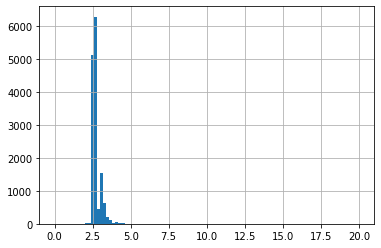

In [27]:
pd.Series(data['ceiling_height'].hist(bins=100, range=(0,20)));

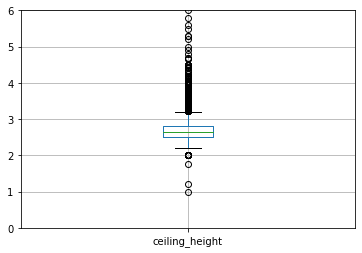

In [28]:
data.boxplot('ceiling_height') # строю диаграмму размаха
plt.ylim(0, 6);

- Из графикоф делаем выводы, что стандартная высота потолков 2,6 метра , так же видим, что стандартное отклонение не так велико.
- Пои этом есть объявления с высотой потолка выше 10 метров

In [29]:
print(data.query('ceiling_height > 5')) # смотрю кол-во строк где потолок больше 5и метров

       total_images  last_price  total_area first_day_exposition  rooms  \
355              17     3600000        55.2           2018-07-12      2   
464              15    66571000       280.3           2015-06-11      6   
1026             20   155000000       310.0           2018-10-12      5   
1388             20    59800000       399.0           2015-01-21      5   
3148             14     2900000        75.0           2018-11-12      3   
3474              3     1400000        30.0           2018-03-16      1   
4643              0     4300000        45.0           2018-02-01      2   
4876              7     3000000        25.0           2017-09-27      0   
5076              0     3850000        30.5           2018-10-03      1   
5246              0     2500000        54.0           2017-10-13      2   
5669              4     4400000        50.0           2017-08-08      2   
5807             17     8150000        80.0           2019-01-09      2   
5863             20     5

In [30]:
print(data.query('ceiling_height < 2')) # смотрю кол-во строк где потолок меньше 2х метров

       total_images  last_price  total_area first_day_exposition  rooms  \
5712              5     1500000        42.8           2017-08-14      2   
16934             5     4100000        40.0           2017-10-17      1   
22590            16     6000000        55.0           2018-10-31      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
5712             1.20             2         27.5      1         False  ...   
16934            1.75            37         17.4      5         False  ...   
22590            1.00            12         32.4      7         False  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
5712           5.20        0      поселок мга               NaN   
16934          8.34        0  санкт-петербург           18732.0   
22590         10.00        0  санкт-петербург           33053.0   

      city_сenters_nearest  parks_around_3000  parks_nearest  \
5712                   NaN                NaN        

- объявлений с высотой потолка ниже 2х метров, всего 3. Предположу, что это жилплощадь с какой-то спецефической планировкой, но точно не подвалы, так как расположны на 1, 5 и 7 этажах соответственно. Удалю эти данные, так как считаю их выбросом
- объявления с высотой потолка выше 5 метров. Тут мы видим всего несколько объявления с высотой потолка до 10 метров, что вполне может быть реальностью ( так как есть двухэтажные квартиры). А вот выше 10 метров, выглядит не совсем правдоподобно. Скорее всего, тут некорректно записали высоту( не в метрах, а в сантиметрах)

In [31]:
data.loc[data['ceiling_height']>10, 'ceiling_height'] = data.loc[data['ceiling_height']>10, 'ceiling_height']/10 #переводим см в м

In [32]:
data['ceiling_height'].describe()

count    14490.000000
mean         2.727846
std          0.299664
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

In [33]:
data['rooms'].unique() # проанализируем кол-во комнат в квартирах

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [34]:
data['rooms'].value_counts()

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

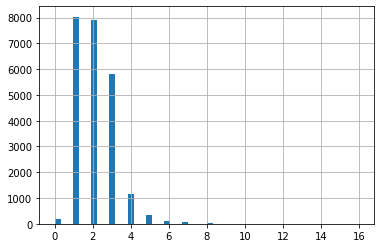

In [35]:
pd.Series(data['rooms'].hist(bins=50, range=(0,16)));

- Пик графика приходится на однокомнатные квартиры. 
- Из полученных данных, можем сделать вывод, что предложения с количеством комнат выше 7 - аномальные значения. Следовательно исключим их из нашего анализа, для получения корректного результат.

In [36]:
good_data = data.query('rooms <= 7') # сохраняю новый df где отрезаю объявление с кол-вом комнат больше 8
info(good_data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,11.0,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [37]:
around_the(good_data['last_price'].describe()) # переходим к анализу цен

count        23619.0
mean       6481787.0
std       10414592.0
min          12190.0
25%        3400000.0
50%        4630000.0
75%        6750000.0
max      763000000.0
Name: last_price, dtype: float64

- И минимальная и максимальные цены выглядят неправдоподобно, рассмотрим подробнее
- Медиана осень отличается от среднего значения, значит есть выбросы

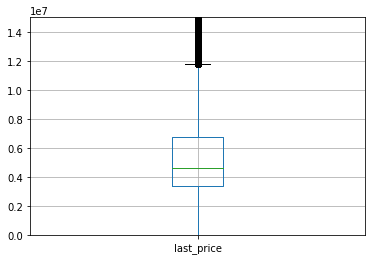

In [38]:
good_data.boxplot('last_price')
plt.ylim(0, 15000000);

Выбросы = наблюдения > Q3 + 1,5*IQR или Q1 – 1,5*IQR

In [39]:
q1 = good_data['last_price'].quantile(0.25)                 
q3 = good_data['last_price'].quantile(0.75)
iqr = q3 - q1
qq1 = q1 - 1.5*iqr
qq3 = q3 + 1.5*iqr

good_data = good_data.query('last_price >= 100000 and last_price <= @qq3') # отсеиваю данные, находящиеся за межквартальным размахом

In [40]:
around_the(good_data['last_price'].describe())

count       21569.0
mean      4831076.0
std       2205596.0
min        430000.0
25%       3300000.0
50%       4400000.0
75%       5999000.0
max      11768000.0
Name: last_price, dtype: float64

- Мы избавились от выбросов
- Значительно уменьшилось стандартное отклонение!

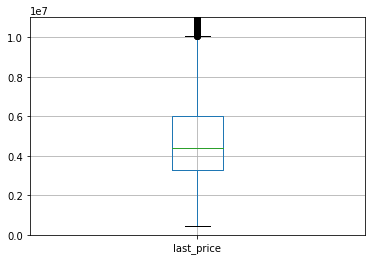

In [41]:
good_data.boxplot('last_price') # строю диаграмму размаха
plt.ylim(0, 11000000);

- Теперь данные в этой колонке выглядят корректно!

In [42]:
around_the(good_data['total_area'].describe()) # посмотрим что произошло с данными по общей площади недвижимости.

count    21569.0
mean        53.0
std         19.0
min         12.0
25%         39.0
50%         49.0
75%         63.0
max        230.0
Name: total_area, dtype: float64

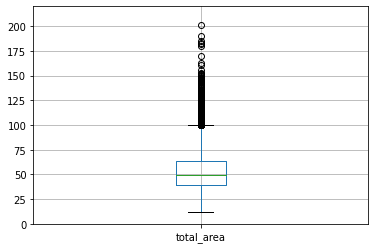

In [43]:
good_data.boxplot('total_area') # строю диаграмму размаха
plt.ylim(0, 220);

- Так как мы уже удалили часть данных в предыдущих вычислениях, данные по метражу выглядят корректно.
- Из датасета пропала квартира с метражом в 900 м.кв.

In [44]:
good_data.shape[0] / data.shape[0]

0.9120084566596195

- Привела данные к корректному, для дальнейшего анализа, виду. 
- Убрала дубликаты, заполнила пропуски, где это было необходимо, удалила выбросы.
- Из 23 699 тыс строк мы оставили 21 569. То есть потеряли меньше 10% данных и можем продолжить анализ.

### Посчитайте и добавьте в таблицу новые столбцы

In [45]:
good_data['price_per_sq'] = good_data['last_price'] / good_data['total_area'] #добавляю цену за квадратный метр
info(around_the(good_data['price_per_sq']))

16022     46988.0
16012     62162.0
7651     160000.0
23050     61628.0
20135     65315.0
Name: price_per_sq, dtype: float64

In [46]:
good_data['week_day'] = good_data['first_day_exposition'].dt.weekday # добавляю день недели

In [47]:
good_data['month'] = good_data['first_day_exposition'].dt.month_name() #добавляю месяц

In [48]:
good_data['year'] = good_data['first_day_exposition'].dt.year # добавляю год
info(good_data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_сenters_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_sq,week_day,month,year
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,December,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,August,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,June,2018
5,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,September,2018
6,6,3700000,37.3,2017-11-02,1,NaN,26,10.6,6,False,...,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,3,November,2017


In [49]:
def type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой' # функция, которая подсвечивает первй и последний этажи в доме

In [50]:
good_data['type_floor'] = good_data.apply(type_floor, axis=1)

In [51]:
good_data['city_centers_nearest_km'] = good_data['city_сenters_nearest'] / 1000 # перевожу в километры растояние до центра города и до аэропорта
good_data['city_centers_nearest_km'] = around_the(good_data['city_centers_nearest_km'])
good_data['airports_nearest_km'] = good_data['airports_nearest'] / 1000
good_data['airports_nearest_km'] = around_the(good_data['airports_nearest_km'])

- Добавила все необходимые столбцы, на основе которых буду строить дальнейшую аналитику
- Так же округлила значения до целых чисел

### Проведите исследовательский анализ данных

In [52]:
around_the(good_data.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_sq,week_day,year,city_centers_nearest_km,airports_nearest_km
count,21569.0,21569.0,21569.0,21569.0,13065.0,21569.0,19887.0,21569.0,19505.0,21569.0,...,16087.0,6698.0,16087.0,7741.0,18936.0,21569.0,21569.0,21569.0,16086.0,16075.0
mean,10.0,4831076.0,53.0,2.0,3.0,11.0,31.0,6.0,10.0,1.0,...,1.0,488.0,1.0,531.0,173.0,91859.0,3.0,2017.0,15.0,29.0
std,6.0,2205596.0,19.0,1.0,0.0,7.0,13.0,5.0,4.0,1.0,...,1.0,327.0,1.0,277.0,211.0,29519.0,2.0,1.0,9.0,13.0
min,0.0,430000.0,12.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,16.0,1.0,7963.0,0.0,2014.0,0.0,0.0
25%,6.0,3300000.0,39.0,1.0,2.0,5.0,18.0,2.0,7.0,0.0,...,0.0,289.0,0.0,315.0,44.0,74444.0,1.0,2017.0,11.0,18.0
50%,9.0,4400000.0,49.0,2.0,3.0,9.0,29.0,4.0,9.0,0.0,...,0.0,456.0,0.0,520.0,91.0,92475.0,3.0,2017.0,14.0,27.0
75%,14.0,5999000.0,63.0,3.0,3.0,16.0,39.0,8.0,11.0,1.0,...,1.0,613.0,1.0,741.0,219.0,109091.0,4.0,2018.0,17.0,38.0
max,50.0,11768000.0,230.0,7.0,8.0,60.0,127.0,33.0,64.0,5.0,...,3.0,3190.0,3.0,1344.0,1580.0,312240.0,6.0,2019.0,66.0,85.0


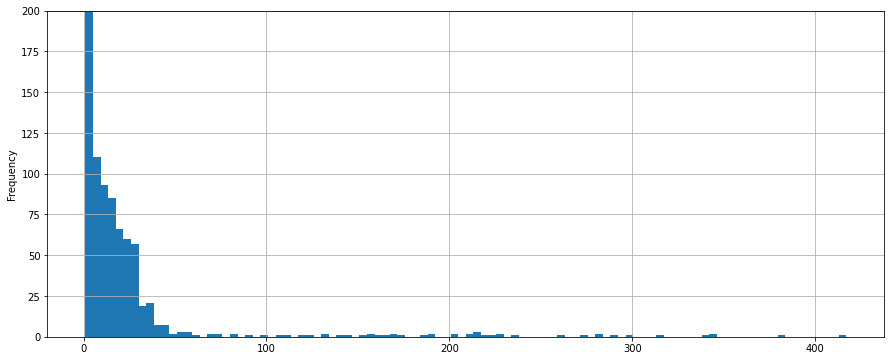

In [53]:
good_data['total_area'].value_counts().plot(kind='hist', ylim=(0,200), bins=100, grid=True, figsize=(15,6));

- В основном, продаются квартиры с общей площадью в 49 квадратных метров.
- Объявления с общей площадью выше 63 метров кывдратных, встречаются гораздо реже.

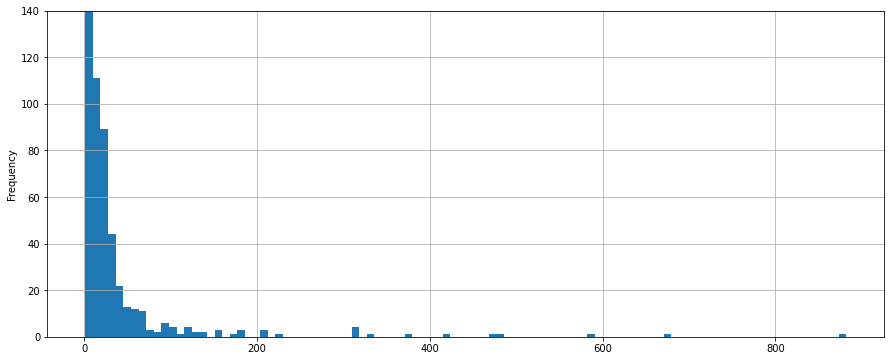

In [54]:
good_data['living_area'].value_counts().plot(kind='hist', ylim=(0,140), bins=100, grid=True, figsize=(15,6));

- Чаще всего, встречаются объявления с жилой площадью в 29 квадратных метров.
- Объявления с жилой площадью выше 39 метров кывдратных, встречаются гораздо реже.

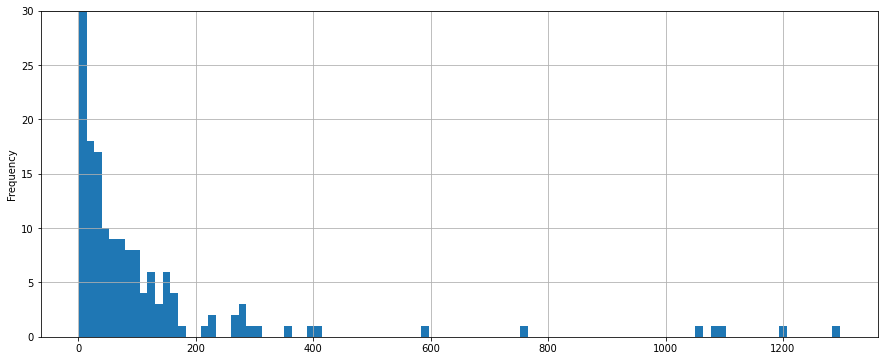

In [55]:
good_data['kitchen_area'].value_counts().plot(kind='hist', ylim=(0,30), bins=100, grid=True, figsize=(15,6));

- Стандартная величина площади кухни равна 9 метров квадр.
- А вот кухни с площадью 11 м.кв можно встретить уже не так часто.

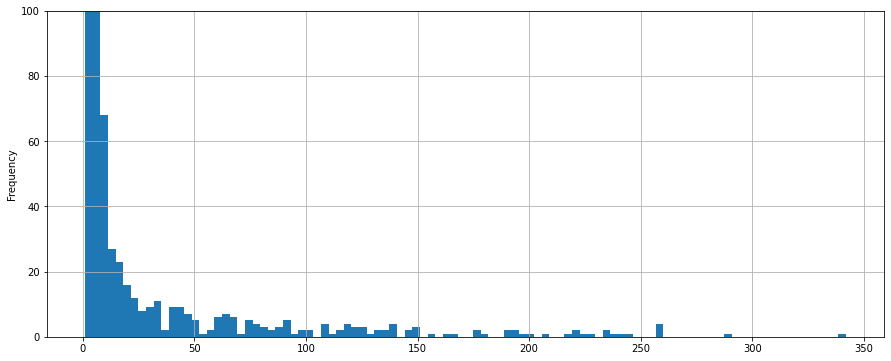

In [56]:
good_data['last_price'].value_counts().plot(kind='hist', ylim=(0,100), bins=100, grid=True, figsize=(15,6));

- Цены большинства квартир находятся в районе четрых с половиной т.руб. (4400000).
- В то время, как рены выше 6000000 т.руб. встречаются уже гораздо реже

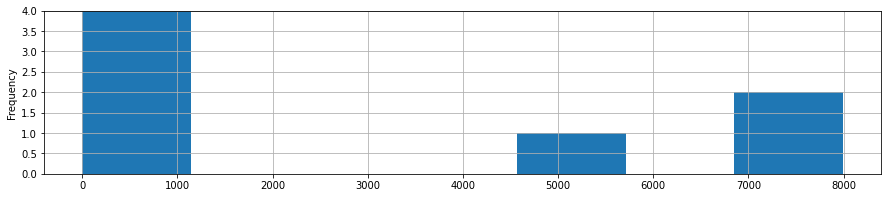

In [57]:
bins = good_data['rooms'].max()
good_data['rooms'].value_counts().plot(kind='hist', ylim=(0,4), bins=bins, grid=True, figsize=(15,3));

- пик графика приходится на объявления с двухкомнатными квартирвами

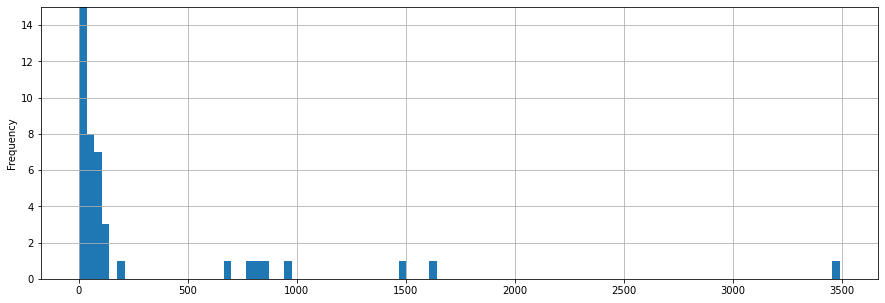

In [58]:
good_data['ceiling_height'].value_counts().plot(kind='hist', ylim=(0,15), bins=100, grid=True, figsize=(15,5));

- Средняя высота потолков = 3 метра

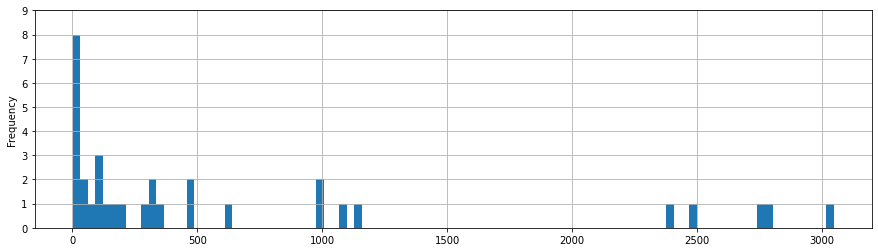

In [59]:
good_data['floor'].value_counts().plot(kind='hist', ylim=(0,9), bins=100, grid=True, figsize=(15,4));

- чаще всего продают квартиры на 4ом этаже
- гораздо реже встречаются квартиры выше 8го этажа

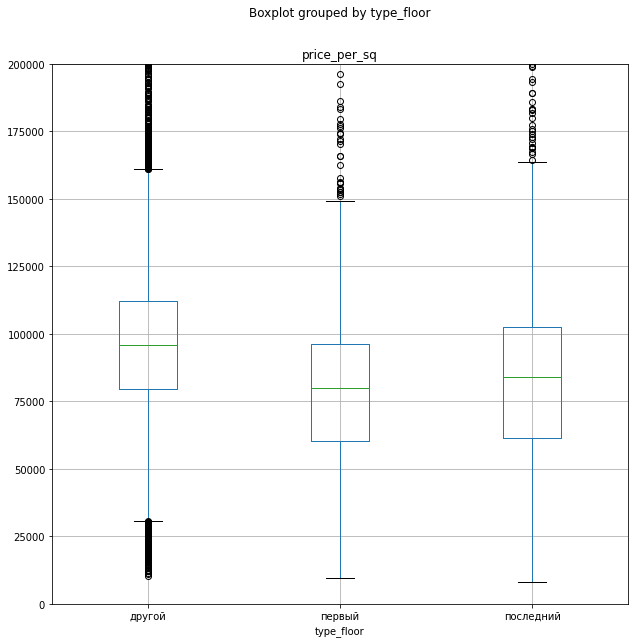

In [60]:
plot = good_data.boxplot('price_per_sq', by='type_floor',figsize=(10,10)).set_ylim(0,200000);

- Квартиры на первом этаже стоят заметно дешевле, чем все остальные этажи.

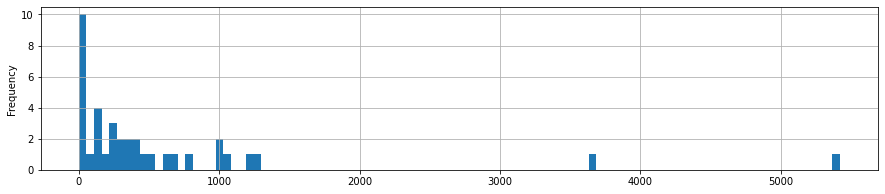

In [61]:
good_data['floors_total'].value_counts().plot(kind='hist', bins=100, grid=True, figsize=(15,3));

Большая часть объявлений - девятиэтажные здания

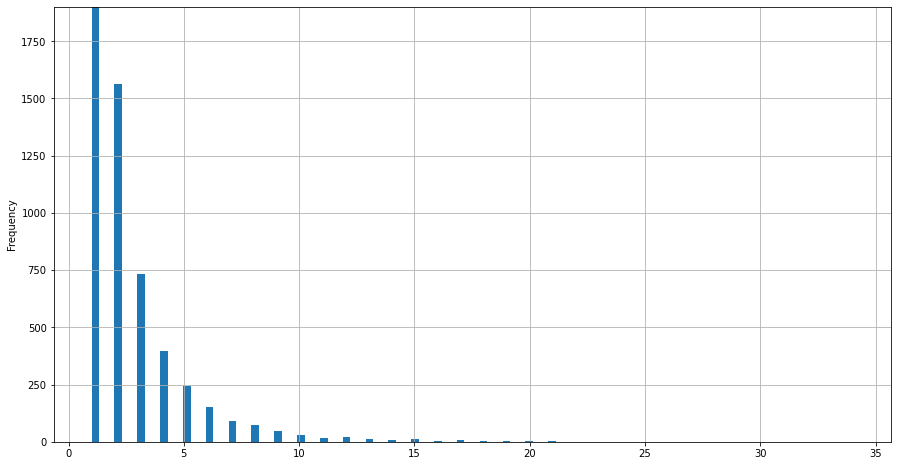

In [62]:
good_data['city_сenters_nearest'].value_counts().plot(kind='hist', ylim=(0,1900), bins=100, grid=True, figsize=(15,8));

- Мы видим, что у большинства объявлений, расстояние до центра города, не так велико. 
- Это может быть связано с тем, что мы обрабатываем не только крупный город Питер, но и мальеникие поселки, которые сами по себе небольшие, соответственно обьявления из Питера и из других городом, лучше оценивать отдельно, для получения полной картины.

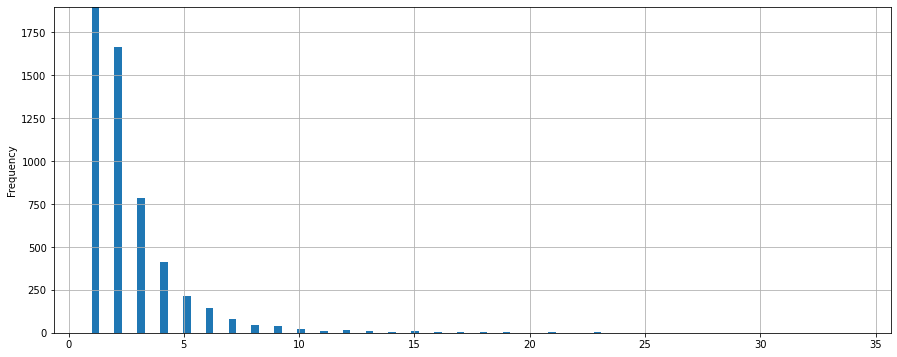

In [63]:
good_data['airports_nearest'].value_counts().plot(kind='hist', ylim=(0,1900), bins=100, grid=True, figsize=(15,6));

- Тут большинсво данных из Питера и близлежащих городов, так как маленькие поселки почти не указывали данное значение в своих объявлениях.

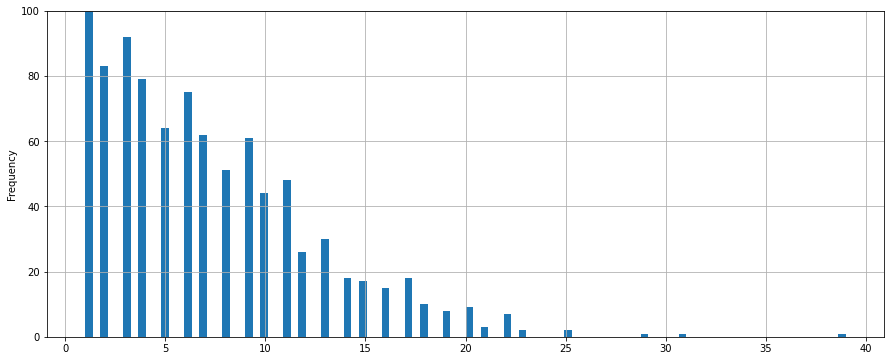

In [64]:
good_data['parks_nearest'].value_counts().plot(kind='hist', ylim=(0,100), bins=100, grid=True, figsize=(15,6));

- Сейчас очень много парков и скверов, поэтому большинство недвижимости расположено недалеко от них.
- Из графика явно выбиваются несколько значений, которые включать в аналитику мы тоже не будем.

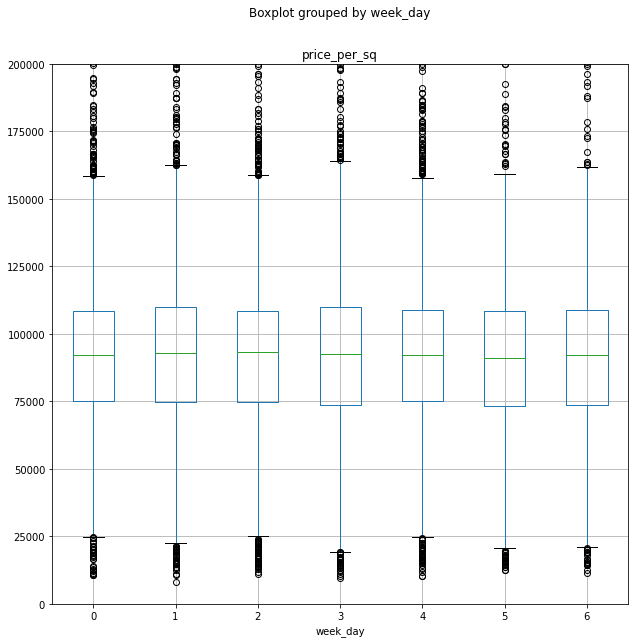

In [65]:
plot = good_data.boxplot('price_per_sq', by='week_day',figsize=(10,10)).set_ylim(0,200000);

- Из графика видно, что медианы по дням недели разнятся минимально, значит не важно в какой день недели выкладывать объявление.

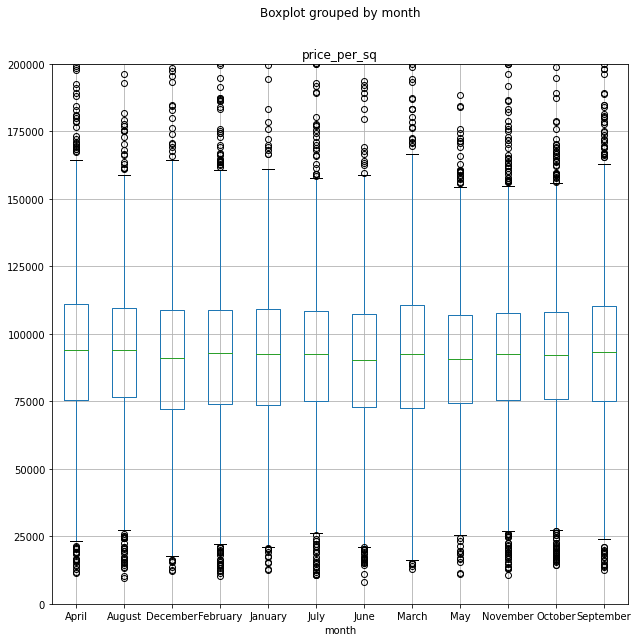

In [66]:
plot = good_data.boxplot('price_per_sq', by='month',figsize=(10,10)).set_ylim(0,200000);

- Ситуация практически идентичная с днями недели. Медианные значения цены за квадратный метр по месяцам, разнятся минимально.
- Чуть хуже, чем все остальные месяца, показывает себя Июнь.

Среднестатистическая квартира выглядит так :
- общая площадь - 49 м.кв.
- цена - 4,4 миллиона рублей
- двухкомнатная
- 3 метра - высота потолков
- в 9-ти этажном доме
- на 4-ом этаже

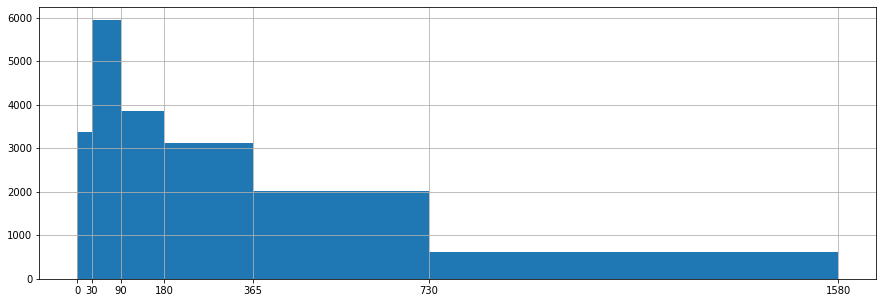

In [67]:
bins = [0, 30, 90, 180, 365, 730, good_data.days_exposition.max()]
good_data.days_exposition.hist(figsize=(15, 5), bins=bins)
plt.xticks(bins);

In [68]:
good_data['days_exposition'].describe()

count    18936.000000
mean       172.983523
std        211.434533
min          1.000000
25%         44.000000
50%         91.000000
75%        219.000000
max       1580.000000
Name: days_exposition, dtype: float64

- Как видно из графика, большинство квартир продаются в течении 50-100 дней, что, так же, подтверждает и медиана. На среднее статистическое значение влияют редкие случаи, когда квартиры продаются более 3000 дней (больше 8 лет).
- К бвыстрым продажам, я бы отнесла, продажи квартир до 70 дней, а к необычно долгим все, что свыше 250 дней.

In [69]:
corr = good_data[['price_per_sq',
           'total_area',
           'living_area',
           'kitchen_area',
           'rooms',
           'floor',
           'type_floor']].corr()
corr.style.background_gradient(cmap='RdGy') # строю таблицу корреляции

,price_per_sq,total_area,living_area,kitchen_area,rooms,floor
price_per_sq,1.000000,-0.099000,-0.181532,0.217425,-0.238733,0.249092
total_area,-0.099000,1.000000,0.911840,0.426316,0.803683,-0.045987
living_area,-0.181532,0.911840,1.000000,0.146861,0.890849,-0.148365
kitchen_area,0.217425,0.426316,0.146861,1.000000,0.045154,0.217260
rooms,-0.238733,0.803683,0.890849,0.045154,1.000000,-0.182234
floor,0.249092,-0.045987,-0.148365,0.217260,-0.182234,1.000000


- Из таблицы видно, что на цену квадратного метра недвижимости, больше всего, влияет этаж, на котором она расположена.
- Так же очень важна площадь кухни.

In [70]:
data_exposition = good_data.query('days_exposition > 0') # создаю выборку по недвижимости, которая уже продана

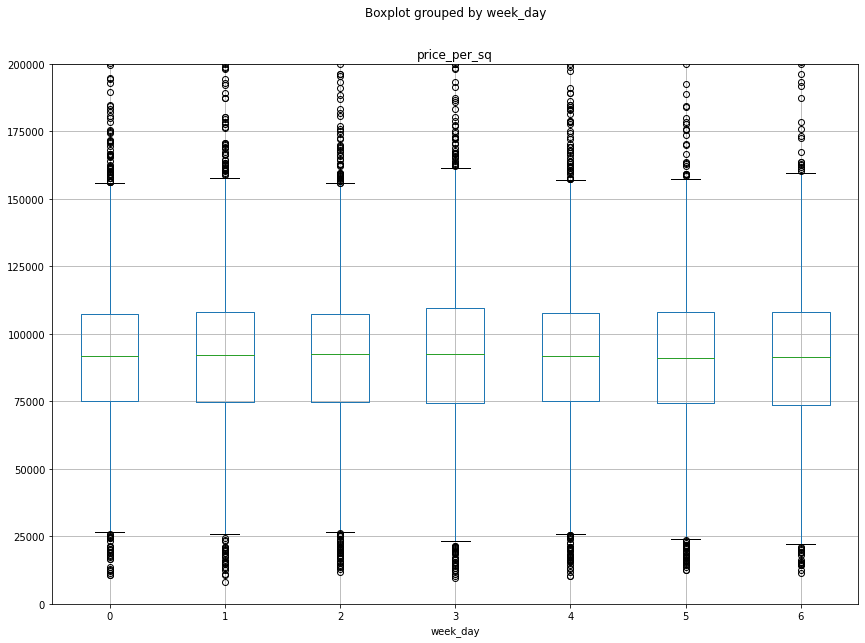

In [71]:
plot = data_exposition.boxplot('price_per_sq', by='week_day',figsize=(14,10)).set_ylim(0,200000)

- Четкой связи стоимомти квадратного метра жилья с днем недели нет.

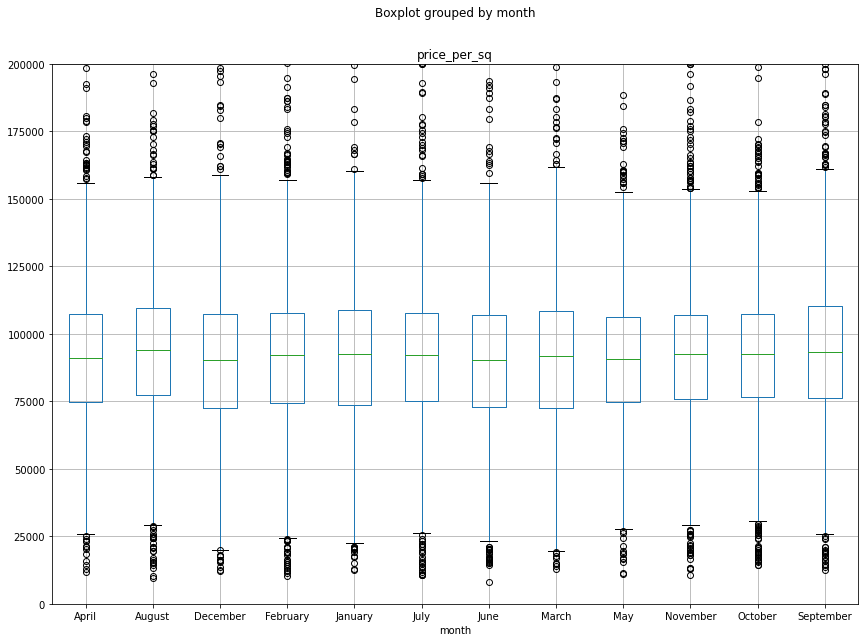

In [72]:
plot = data_exposition.boxplot('price_per_sq', by='month',figsize=(14,10)).set_ylim(0,200000)

- В июле, августе, январе, сентябре и ноябре - стоимость кв.м. немного возрастает, но четкой кореляции между стоимостью кв.м. и месяцами года нет.

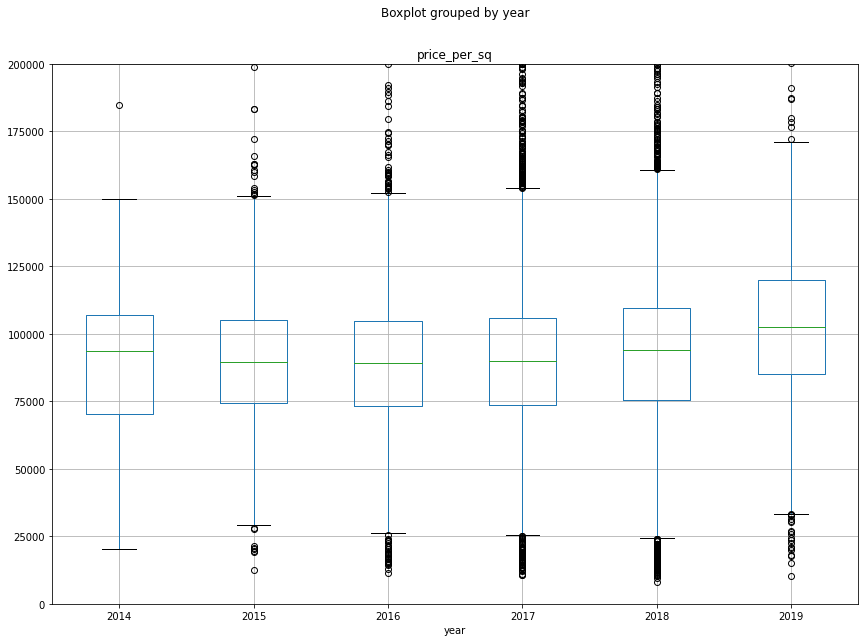

In [73]:
plot = data_exposition.boxplot('price_per_sq', by='year',figsize=(14,10)).set_ylim(0,200000)

Совсем другое дело с годами: 
- Здесь четко прослеживается падение стоимости жилья уже в 2015ом году
- И рост цен уже с 2017 года с пиком в 2019ом году.
- Что вполне коррелирует с экономикой РФ.

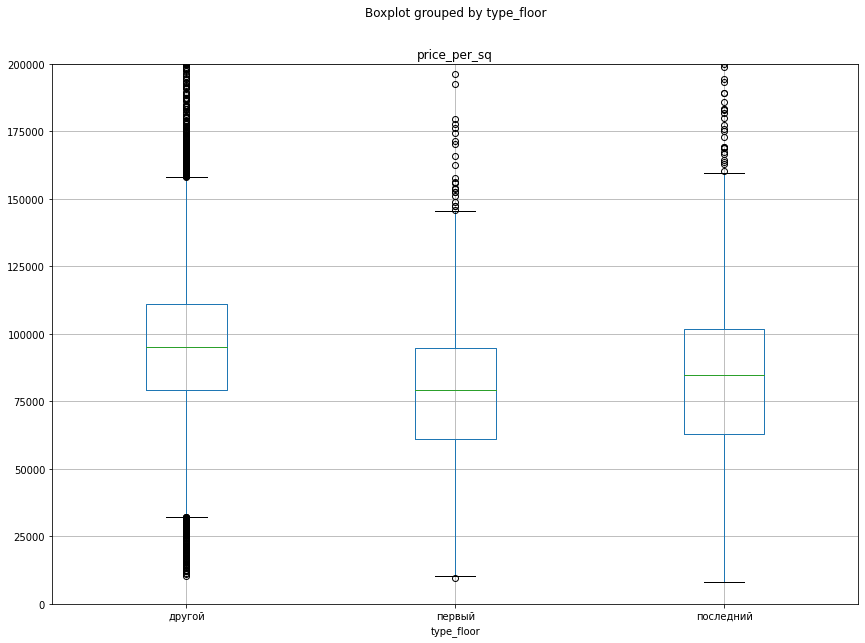

In [74]:
plot = data_exposition.boxplot('price_per_sq', by='type_floor',figsize=(14,10)).set_ylim(0,200000)

- Отчетливо видна связь стоимости квадратного метра недвижимости с тем, на какаом этаже она расположена.
- Первый этаж очень удешевляет квартиру.
- Чуть меньше дешевит квартиру расположение на последнем этаже.
- Комфортнее всего в цене, чувствуют себя квартиры, находящиеся между первым и последним этажами.

In [75]:
good_data.groupby('locality_name').agg({'price_per_sq':'mean'}).sort_values(by='price_per_sq', ascending=False).round().head(2)

,price_per_sq
locality_name,
санкт-петербург,105385.0
поселок лисий нос,100661.0


- самая высокая стоимость квадратного метра встречается в Зеленогорске.

In [76]:
good_data.groupby('locality_name').agg({'price_per_sq':'mean'}).sort_values(by='price_per_sq', ascending=False).round().tail(2)

,price_per_sq
locality_name,
поселок свирь,11481.0
деревня старополье,11206.0


- самая низкая стоимость квадратного метра встречается в деревне Старопополье.

In [77]:
good_data.groupby('locality_name')['price_per_sq'].count().sort_values(ascending=False).head(10) # 10 населенных пунктов с наибольшим кол-вом объявлений

locality_name
санкт-петербург      13711
поселок мурино         556
поселок шушары         440
всеволожск             397
пушкин                 338
колпино                336
поселок парголово      327
гатчина                305
деревня кудрово        298
выборг                 236
Name: price_per_sq, dtype: int64

In [78]:
top_10_local = good_data.groupby('locality_name').agg({'locality_name':'count','price_per_sq':'mean'})
top_10_local.columns = ['count', 'price_per_sq']
top_10_local = top_10_local.sort_values('count', ascending=False).round().head(10)
print(top_10_local) # добавила стоимость квадратного метра к топ 10 насел. пунктам по кол=ву объявлений

                   count  price_per_sq
locality_name                         
санкт-петербург    13711      105385.0
поселок мурино       556       85682.0
поселок шушары       440       78677.0
всеволожск           397       67214.0
пушкин               338      100291.0
колпино              336       75185.0
поселок парголово    327       90176.0
гатчина              305       68422.0
деревня кудрово      298       92410.0
выборг               236       57933.0


- Как видно из расчета, больше всего квартир продается именно в Питере и близлежащик к мнему городах/ поселках
- Цена за кв.м. в большинстве из этих населенных пунктах находится ниже медианы (92475.0)

In [79]:
city_centers_stats = good_data.query('locality_name == "санкт-петербург"') # делаю срез по питеру
city_centers_good = city_centers_stats.pivot_table(index='city_centers_nearest_km', values='price_per_sq').round()
print(city_centers_good.head(20)) # вывожу удаленность от аэропорта и цену за м.кв.

                         price_per_sq
city_centers_nearest_km              
0.0                          119158.0
1.0                          119578.0
2.0                          113551.0
3.0                          109104.0
4.0                          113717.0
5.0                          119637.0
6.0                          121855.0
7.0                          116454.0
8.0                          115527.0
9.0                          106554.0
10.0                         108256.0
11.0                         104215.0
12.0                         105704.0
13.0                         106177.0
14.0                         103374.0
15.0                         102264.0
16.0                          99406.0
17.0                          95240.0
18.0                          96025.0
19.0                          97289.0


In [80]:
print(city_centers_stats['city_centers_nearest_km'].corr(city_centers_stats['price_per_sq'])) # расчитываю корреляцию

-0.2792460919462411


Text(0, 0.5, 'city_centers_nearest_km')

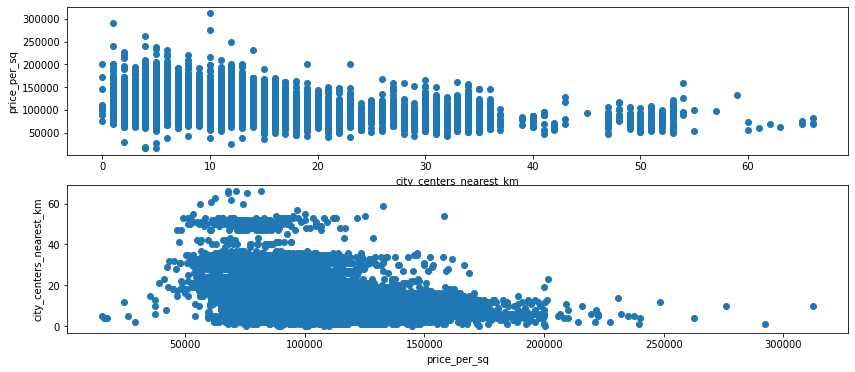

In [81]:
fig, ax = plt.subplots(2, figsize=(14, 6));
ax[0].scatter(x = good_data['city_centers_nearest_km'], y = good_data['price_per_sq'])
ax[0].set_xlabel("city_centers_nearest_km")
ax[0].set_ylabel("price_per_sq")

ax[1].scatter(x = good_data['price_per_sq'], y = good_data['city_centers_nearest_km'])
ax[1].set_xlabel("price_per_sq")
ax[1].set_ylabel("city_centers_nearest_km")

- Из расчетов и графиков видна отрицательная корреляция между стоимостью квадратного метра и удаленностью от центра города.
- Логично, что чем дальше от центра города находится квартира, тем дешевле она будет стоить.

### Общий вывод

#### В ходе исследования: 
- На начальном этапе я проверила данные на дубликаты (явные и не явные). Удалила их из датасета.
- Устранила пропуски в данных, где это было возможно.
- Изменила тип некоторых данных, для удобства анализа.
- Нашла и устранила аномалии в данных.
- Рассчитала и добавила новые столбцы, которые понадобятся для последующего анализа.
- Проанализировала основные данные недвижимости в Питере и районе.
- Построила гистограммы для каждого параметра.
- Изучила как быстро продавались квартиры и какие факторы влияют на стоимость объекта. 
- Рассчитала среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
 
#### На основе проведенного мною анализа, пришла к следующим выводам
- Самая высока cтоимость жилья, не в самом Питере, а в близлежащем городе Зеленогорске. Возможно там находятся какие-то элитные дома, поэтому и стоимость гораздо выше.
- Самые дешевые предложения можно найти в деревне Старополье. 
- Стоимость жилья дешевеет в зависимости от удаленности от центра города. 
- Так же более дешевими считаются квартиры на первом этаже.
- Не важно в какой день недели или месяц выкладывать объявление, зато ОЧЕНЬ важен год. С каждым годом, начиная с 2017, квартиры только дорожают.
- Квартиры, чаще всего, продаются за 91 день.
- Самый бюджетный вариант квартиры выглядит следующим образом : квартира на первом этаже, в деревне Старополье.
- Самый дорогой вариант - недвижимость в Зеленогорске, в центре города.